<a href="https://www.kaggle.com/code/mostafahabibi1994/car-price-prediction-using-regression?scriptVersionId=151280003" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Readig the Data & Initial Analysis

In [2]:
#reading the dataset file
data = pd.read_csv('/kaggle/input/cardata/cardata.csv')
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
#data framing the dataset
df1 = pd.DataFrame(data , columns = data.drop(columns='Car_Name').columns)
df1

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
list(df1.columns)

['Year',
 'Selling_Price',
 'Present_Price',
 'Kms_Driven',
 'Fuel_Type',
 'Seller_Type',
 'Transmission',
 'Owner']

In [5]:
#looking for NaN values
df1.isna().sum()

Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:

df1.describe().T.style.background_gradient(cmap = 'viridis')

,count,mean,std,min,25%,50%,75%,max
Year,301.000000,2013.627907,2.891554,2003.000000,2012.000000,2014.000000,2016.000000,2018.000000
Selling_Price,301.000000,4.661296,5.082812,0.100000,0.900000,3.600000,6.000000,35.000000
Present_Price,301.000000,7.628472,8.644115,0.320000,1.200000,6.400000,9.900000,92.600000
Kms_Driven,301.000000,36947.205980,38886.883882,500.000000,15000.000000,32000.000000,48767.000000,500000.000000
Owner,301.000000,0.043189,0.247915,0.000000,0.000000,0.000000,0.000000,3.000000


In [7]:
df1['Age_n'] = df1['Year'].max()+1 - df1['Year']
df1.insert(1,'Age',df1.Age_n)
df1 = df1.drop(columns = 'Age_n')
df1 = df1.drop(columns = 'Year')
df1

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,6,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,8,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,5,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,3,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,4,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,10,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB


In [9]:
from sklearn.preprocessing import LabelEncoder


In [10]:
label_map = {}
for col in df1.columns :
    label_encoder = LabelEncoder()
    if df1[col].dtype == 'object' :
        df1[col] = label_encoder.fit_transform(df1[col])
        label_map[col] = {'mapping': dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))}
                                              
        

In [11]:
df1

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,3.35,5.59,27000,2,0,1,0
1,6,4.75,9.54,43000,1,0,1,0
2,2,7.25,9.85,6900,2,0,1,0
3,8,2.85,4.15,5200,2,0,1,0
4,5,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...
296,3,9.50,11.60,33988,1,0,1,0
297,4,4.00,5.90,60000,2,0,1,0
298,10,3.35,11.00,87934,2,0,1,0
299,2,11.50,12.50,9000,1,0,1,0


In [12]:
label_map

{'Fuel_Type': {'mapping': {'CNG': 0, 'Diesel': 1, 'Petrol': 2}},
 'Seller_Type': {'mapping': {'Dealer': 0, 'Individual': 1}},
 'Transmission': {'mapping': {'Automatic': 0, 'Manual': 1}}}

In [13]:
df1['Kms_Driven'] = df1['Kms_Driven'] / 1000
df1['Kms_Driven'] = df1['Kms_Driven'].astype(float).round(1)
df1

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,3.35,5.59,27.0,2,0,1,0
1,6,4.75,9.54,43.0,1,0,1,0
2,2,7.25,9.85,6.9,2,0,1,0
3,8,2.85,4.15,5.2,2,0,1,0
4,5,4.60,6.87,42.4,1,0,1,0
...,...,...,...,...,...,...,...,...
296,3,9.50,11.60,34.0,1,0,1,0
297,4,4.00,5.90,60.0,2,0,1,0
298,10,3.35,11.00,87.9,2,0,1,0
299,2,11.50,12.50,9.0,1,0,1,0


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    float64
 4   Fuel_Type      301 non-null    int64  
 5   Seller_Type    301 non-null    int64  
 6   Transmission   301 non-null    int64  
 7   Owner          301 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 18.9 KB


In [15]:
df1.describe(include='all').T.style.background_gradient(cmap='viridis')

,count,mean,std,min,25%,50%,75%,max
Age,301.000000,5.372093,2.891554,1.000000,3.000000,5.000000,7.000000,16.000000
Selling_Price,301.000000,4.661296,5.082812,0.100000,0.900000,3.600000,6.000000,35.000000
Present_Price,301.000000,7.628472,8.644115,0.320000,1.200000,6.400000,9.900000,92.600000
Kms_Driven,301.000000,36.946512,38.886807,0.500000,15.000000,32.000000,48.800000,500.000000
Fuel_Type,301.000000,1.787375,0.425801,0.000000,2.000000,2.000000,2.000000,2.000000
Seller_Type,301.000000,0.352159,0.478439,0.000000,0.000000,0.000000,1.000000,1.000000
Transmission,301.000000,0.867110,0.340021,0.000000,1.000000,1.000000,1.000000,1.000000
Owner,301.000000,0.043189,0.247915,0.000000,0.000000,0.000000,0.000000,3.000000


# EDA

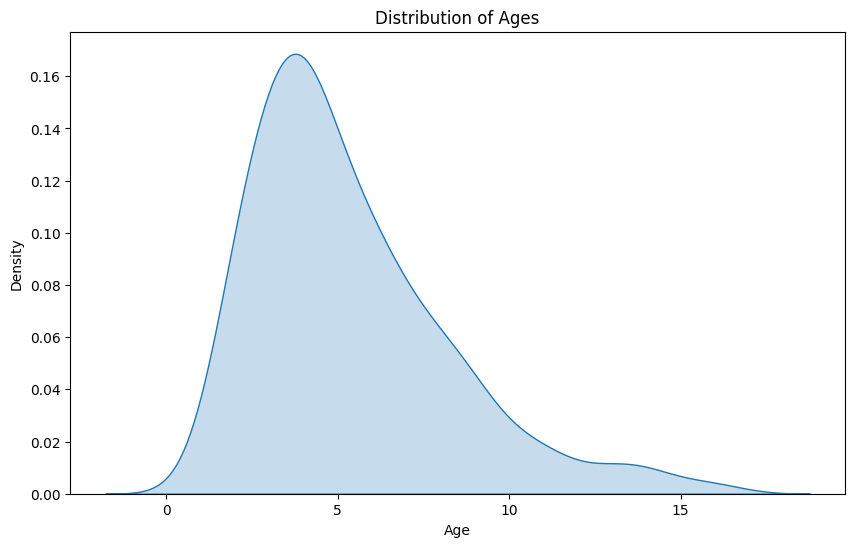

In [16]:
plt.figure(figsize = (10,6))
sns.kdeplot(data=df1 , x = 'Age' , fill = True) 
plt.title('Distribution of Ages')
plt.show()

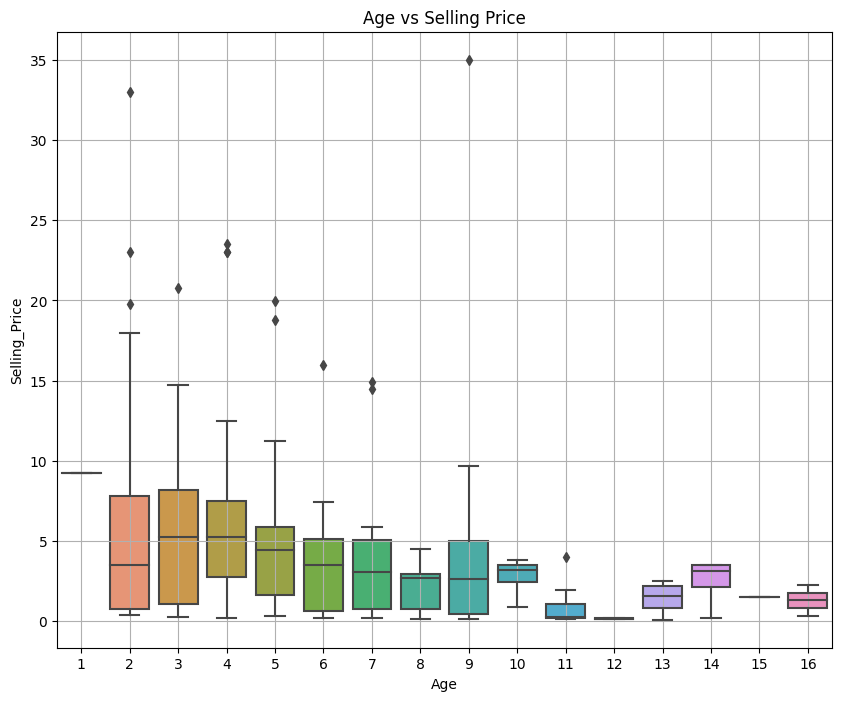

In [17]:
plt.figure(figsize = (10,8))
sns.boxplot(data = df1 , x = 'Age' , y = 'Selling_Price')
plt.title('Age vs Selling Price')
plt.grid()
plt.show()

In [18]:
df1[df1['Selling_Price'] > 17]

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
51,4,23.00,30.61,40.0,1,0,0,0
52,2,18.00,19.77,15.0,1,0,0,0
59,5,19.99,35.96,41.0,1,0,0,0
62,5,18.75,35.96,78.0,1,0,0,0
63,4,23.50,35.96,47.0,1,0,0,0
64,2,33.00,36.23,6.0,1,0,0,0
66,2,19.75,23.15,11.0,2,0,0,0
82,2,23.00,25.39,15.0,1,0,0,0
86,9,35.00,92.60,78.0,1,0,1,0
93,4,23.00,30.61,40.0,1,0,0,0


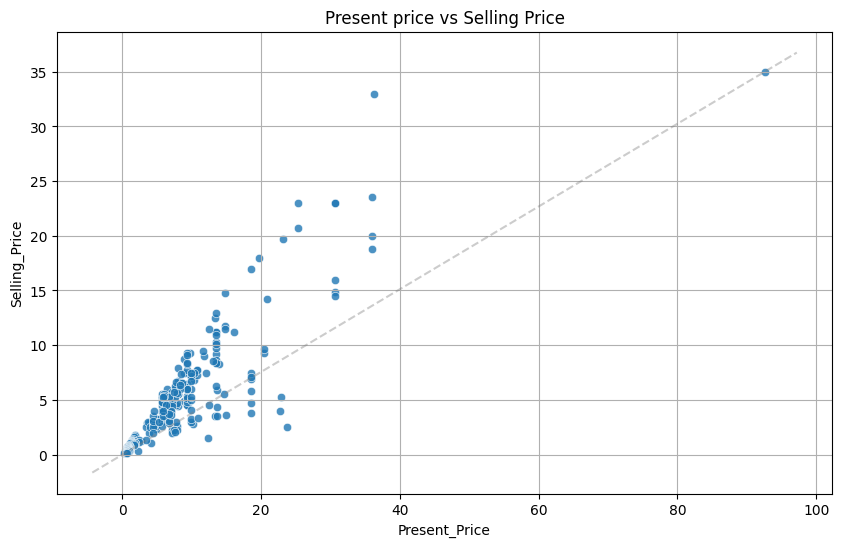

In [19]:
plt.figure(figsize = (10, 6))
sns.scatterplot(data = df1 , x = 'Present_Price' , y = 'Selling_Price'  , alpha = 0.8)
plt.grid()
plt.title('Present price vs Selling Price')
plt.plot(plt.xlim(),plt.ylim(),color = 'gray' , linestyle = '--' , alpha = 0.4)

In [20]:
df1[df1['Present_Price'] > 80]

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
86,9,35.0,92.6,78.0,1,0,1,0


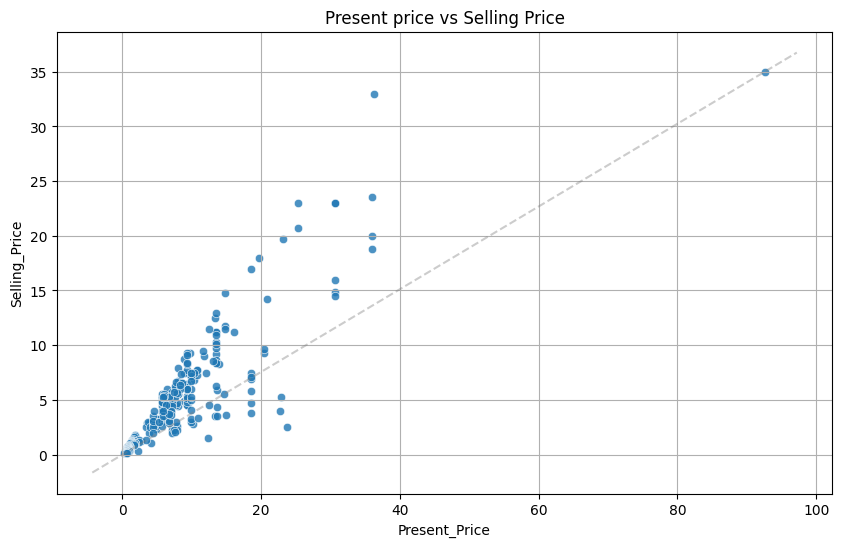

In [21]:
plt.figure(figsize = (10, 6))
sns.scatterplot(data = df1 , x = 'Present_Price' , y = 'Selling_Price'  , alpha = 0.8)
plt.grid()
plt.title('Present price vs Selling Price')
plt.plot(plt.xlim(),plt.ylim(),color = 'gray' , linestyle = '--' , alpha = 0.4)

In [22]:
df1['Price_difference'] = abs(df1['Present_Price'] - df1['Selling_Price'])
df1

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Price_difference
0,5,3.35,5.59,27.0,2,0,1,0,2.24
1,6,4.75,9.54,43.0,1,0,1,0,4.79
2,2,7.25,9.85,6.9,2,0,1,0,2.60
3,8,2.85,4.15,5.2,2,0,1,0,1.30
4,5,4.60,6.87,42.4,1,0,1,0,2.27
...,...,...,...,...,...,...,...,...,...
296,3,9.50,11.60,34.0,1,0,1,0,2.10
297,4,4.00,5.90,60.0,2,0,1,0,1.90
298,10,3.35,11.00,87.9,2,0,1,0,7.65
299,2,11.50,12.50,9.0,1,0,1,0,1.00


In [23]:
threshold = 12

not_close_prices = df1[df1['Price_difference'] > threshold]
not_close_prices

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Price_difference
50,7,14.90,30.61,104.7,1,0,0,0,15.71
53,6,16.00,30.61,135.0,1,1,0,0,14.61
57,9,4.75,18.54,50.0,2,0,1,0,13.79
59,5,19.99,35.96,41.0,1,0,0,0,15.97
62,5,18.75,35.96,78.0,1,0,0,0,17.21
63,4,23.50,35.96,47.0,1,0,0,0,12.46
78,9,5.25,22.83,80.0,2,0,0,0,17.58
79,7,14.50,30.61,89.0,1,0,0,0,16.11
85,13,2.50,23.73,142.0,2,1,0,3,21.23
86,9,35.00,92.60,78.0,1,0,1,0,57.60


In [24]:
df1 = df1.drop(columns = 'Price_difference')
df1

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,3.35,5.59,27.0,2,0,1,0
1,6,4.75,9.54,43.0,1,0,1,0
2,2,7.25,9.85,6.9,2,0,1,0
3,8,2.85,4.15,5.2,2,0,1,0
4,5,4.60,6.87,42.4,1,0,1,0
...,...,...,...,...,...,...,...,...
296,3,9.50,11.60,34.0,1,0,1,0
297,4,4.00,5.90,60.0,2,0,1,0
298,10,3.35,11.00,87.9,2,0,1,0
299,2,11.50,12.50,9.0,1,0,1,0


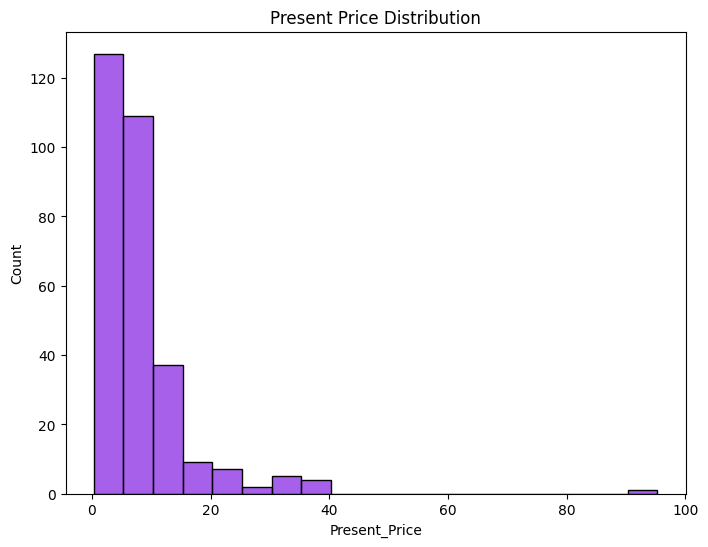

In [25]:
plt.figure(figsize=(8 , 6))
sns.histplot(data = df1 , x = 'Present_Price',binwidth=5 ,color = 'blueviolet' , bins = 20 , edgecolor = 'black',fill = True)
plt.title('Present Price Distribution')
plt.show()

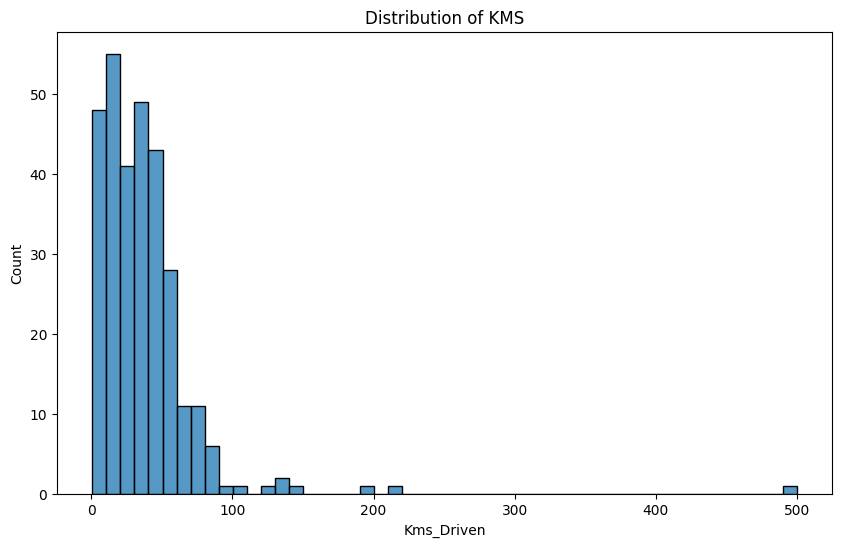

In [26]:
plt.figure(figsize = (10,6))
sns.histplot(data=df1 , x = 'Kms_Driven' , fill = True) 
plt.title('Distribution of KMS')
plt.show()

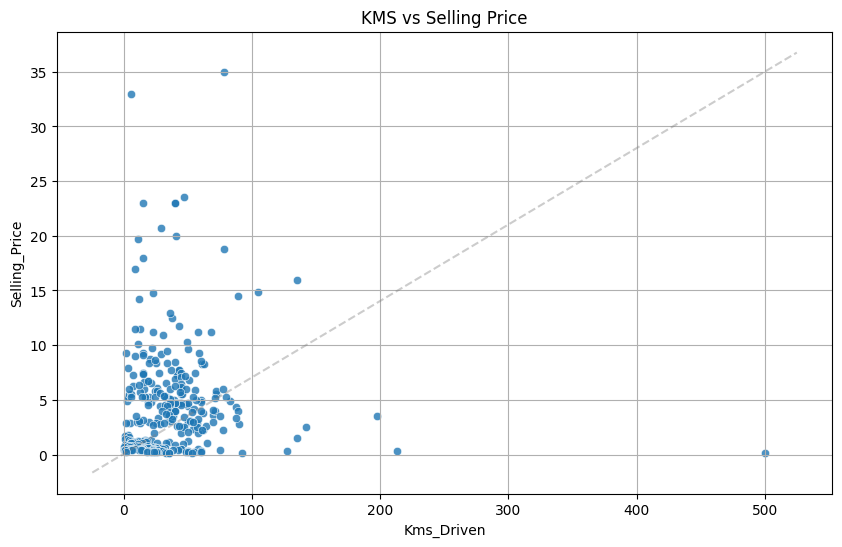

In [27]:
plt.figure(figsize = (10, 6))
sns.scatterplot(data = df1 , x = 'Kms_Driven' , y = 'Selling_Price'  , alpha = 0.8)
plt.grid()
plt.title('KMS vs Selling Price')
plt.plot(plt.xlim(),plt.ylim(),color = 'gray' , linestyle = '--' , alpha = 0.4)

In [28]:
df1[df1['Kms_Driven'] > 400]

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
196,11,0.17,0.52,500.0,2,1,0,0


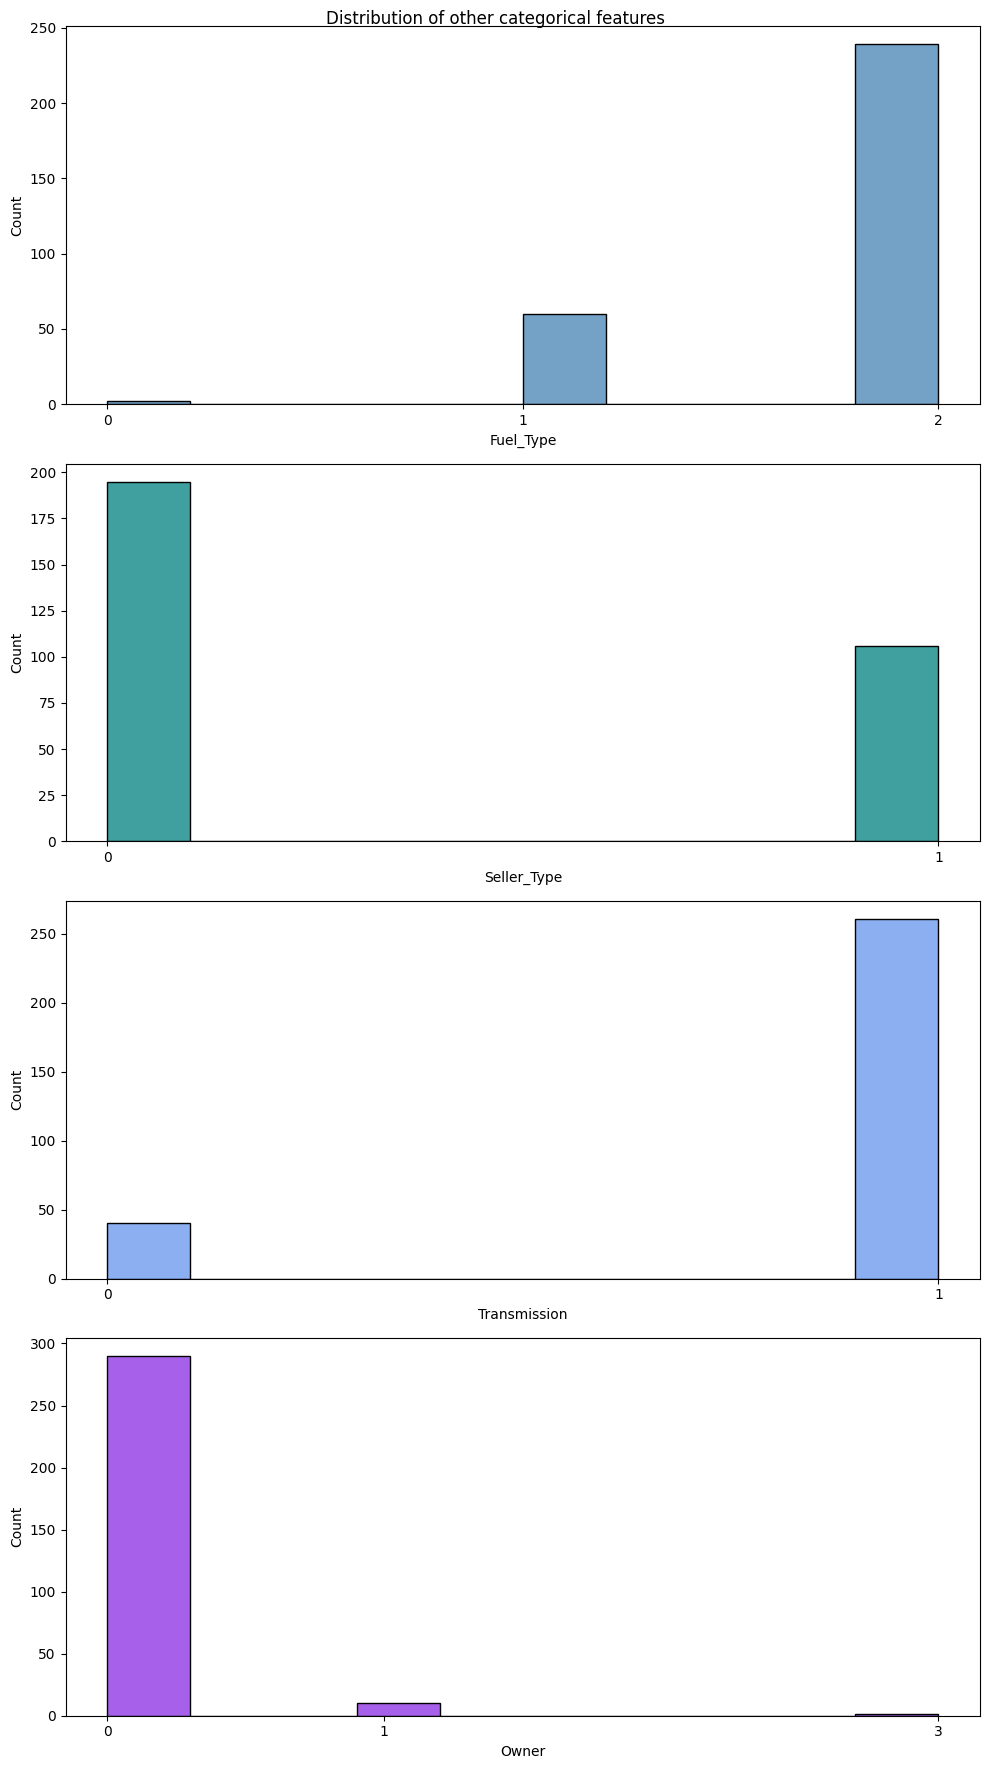

In [29]:
fig , axs = plt.subplots(4,1,figsize = (10,18))
plt.suptitle('Distribution of other categorical features')
sns.histplot(data=df1 , x = 'Fuel_Type' , fill = True ,ax =axs[0] ,color = 'steelblue' , edgecolor = 'black') 
sns.histplot(data=df1 , x = 'Seller_Type' , fill = True ,ax =axs[1] ,color = 'teal' , edgecolor = 'black') 
sns.histplot(data=df1 , x = 'Transmission' , fill = True ,ax =axs[2] ,color = 'cornflowerblue' , edgecolor = 'black')
sns.histplot(data=df1 , x = 'Owner' , fill = True ,ax =axs[3] ,color = 'blueviolet' , edgecolor = 'black')
axs[0].set_xticks(df1['Fuel_Type'].unique())
axs[1].set_xticks(df1['Seller_Type'].unique())
axs[2].set_xticks(df1['Transmission'].unique())
axs[3].set_xticks(df1['Owner'].unique())
axs[0].grid(False)
axs[1].grid(False)
axs[2].grid(False)
axs[3].grid(False)
plt.tight_layout()
plt.show()


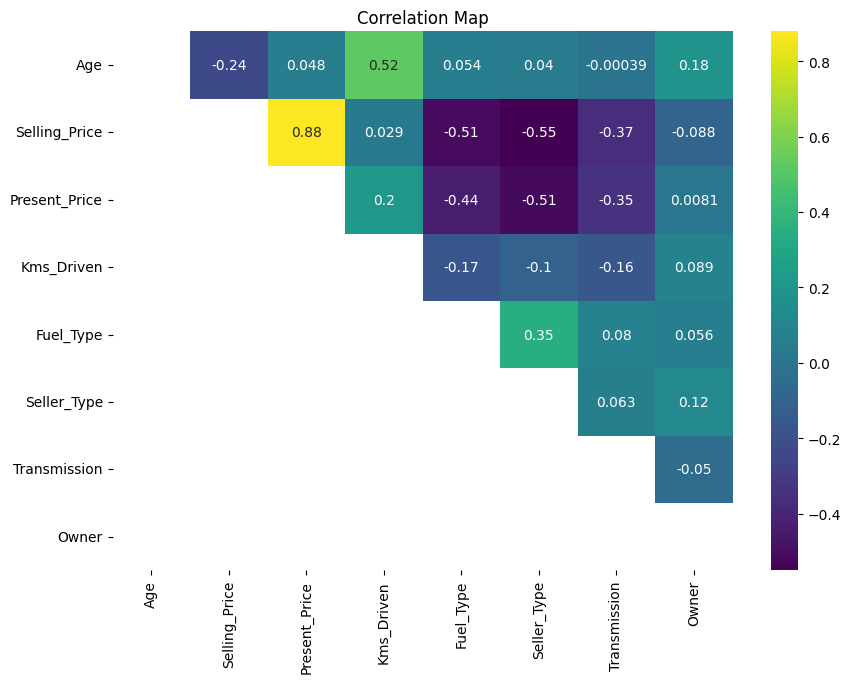

In [30]:
plt.figure(figsize=(10,7))
sns.heatmap(df1.corr() , annot=True , cmap = 'viridis' , mask = np.tril(np.ones_like(df1.corr())))
plt.title('Correlation Map')
plt.show()

# Making ML Models

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold , cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression , Ridge , Lasso
model = LinearRegression()
Ridge = Ridge(alpha = 1.0)
Lasso = Lasso(alpha = 1.0)

In [32]:
x = df1.drop(columns='Selling_Price')
y = df1['Selling_Price'].values.reshape(-1,1)

In [33]:
x_train , x_test, y_train , y_test = train_test_split(x,y,test_size=0.2)

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [34]:
for k in range(2,12):
    kf = KFold(n_splits = k)
    print(f"For {k} Folds : {np.mean(cross_val_score(model,x,y,cv=kf , scoring = 'r2' ))} ")

For 2 Folds : 0.6692017306406649 
For 3 Folds : -26.789164188235787 
For 4 Folds : 0.6015304080218692 
For 5 Folds : -18.31014401710292 
For 6 Folds : -101.1169416074203 
For 7 Folds : -25.025536091638482 
For 8 Folds : -57.756817350288365 
For 9 Folds : -46.505614905537286 
For 10 Folds : -111.78247598183798 
For 11 Folds : -104.77814077263243 


In [35]:
for k in range(2,12):
    kf = KFold(n_splits = k)
    print(f"For {k} Folds : {np.mean(cross_val_score(model,x_train,y_train,cv=kf , scoring = 'r2' ))} ")

For 2 Folds : 0.7209530533832875 
For 3 Folds : 0.7594809736599867 
For 4 Folds : 0.8038070433493557 
For 5 Folds : 0.7842762662766153 
For 6 Folds : 0.8067396350089301 
For 7 Folds : 0.7918928233418667 
For 8 Folds : 0.8070615036529329 
For 9 Folds : 0.8074721092704541 
For 10 Folds : 0.7736096535783672 
For 11 Folds : 0.8143447865863277 


In [36]:
for k in range(2,12):
    kf = KFold(n_splits = k)
    print(f"For {k} Folds : {np.mean(cross_val_score(model,x_test,y_test,cv=kf , scoring = 'r2' ))} ")

For 2 Folds : 0.7677133330949657 
For 3 Folds : 0.6868150336406426 
For 4 Folds : 0.6739120101984258 
For 5 Folds : 0.738598421887527 
For 6 Folds : 0.6169890041583063 
For 7 Folds : 0.6335133544006112 
For 8 Folds : 0.5767386811731662 
For 9 Folds : 0.5681464785902166 
For 10 Folds : 0.21477118881882254 
For 11 Folds : 0.5376990764653731 


In [37]:
kf = KFold(n_splits=10)
cvs = cross_val_score(model,x,y,cv=kf , scoring = 'r2' )
cvs

array([ 6.63512007e-01,  8.80842461e-01,  7.23706720e-01,  8.63126260e-01,
       -4.36492438e+01, -1.07944318e+03, -3.49951927e-01,  7.84372877e-01,
        8.27980403e-01,  8.74075524e-01])

In [38]:
model.fit(x_train , y_train)
print('Training Accuracy : ' , model.score(x_train , y_train))
print('Testing Accuracy : ' , model.score(x_test , y_test))

Training Accuracy :  0.8856993313786654
Testing Accuracy :  0.8361384191209733


In [39]:
y_pred = model.predict(x_test)

print('Mean Absolute Error : ',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error : ',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error : ' , np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2 Score : ',r2_score(y_test,y_pred))

Mean Absolute Error :  1.287239761802269
Mean Squared Error :  3.7476910398510963
Root Mean Squared Error :  1.935895410359531
R2 Score :  0.8361384191209733


In [40]:
pd.DataFrame(model.coef_ , columns=df1.drop(columns = 'Selling_Price').columns)

,Age,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,-1.069045,3.916859,-0.19309,-0.617916,-0.557031,-0.48852,-0.266349


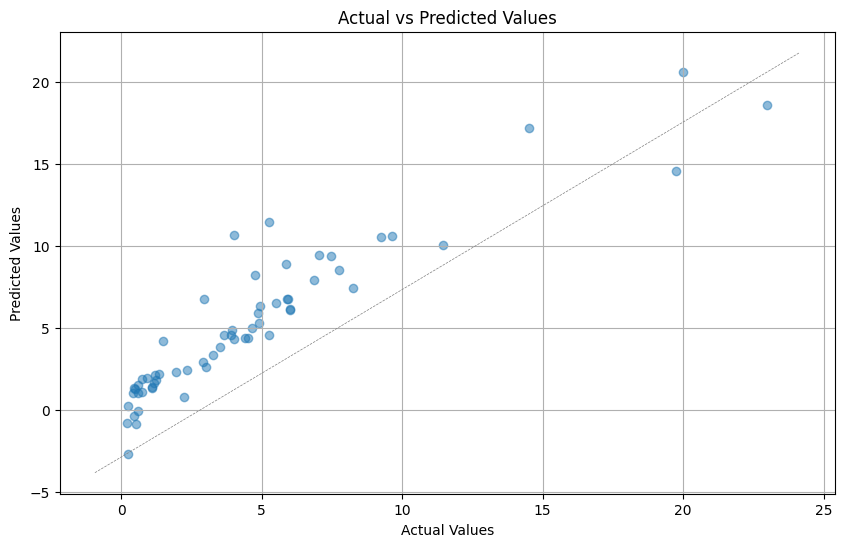

In [41]:
plt.figure(figsize = (10,6))
plt.scatter(y_test,y_pred,alpha = 0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.title('Actual vs Predicted Values')
plt.plot(plt.xlim(),plt.ylim(), '--',linewidth=.5,color='gray' )
plt.show()

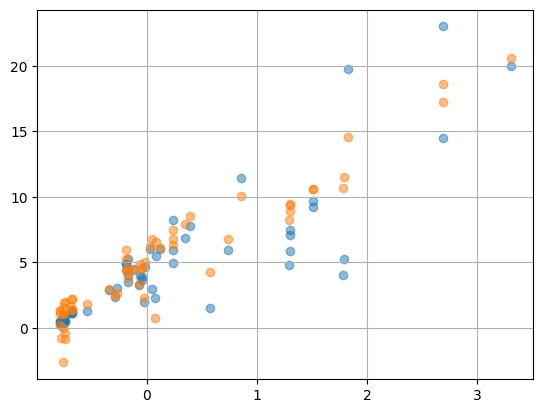

In [42]:
plt.scatter(x_test[: , 1],y_test,alpha = .5)
plt.scatter(x_test[: , 1],y_pred,alpha = .5)
plt.grid()

In [43]:
Ridge.fit(x_train , y_train)
print('Training Accuracy : ' , Ridge.score(x_train, y_train))
print('Testing Accuracy : ' , Ridge.score(x_test , y_test))

Training Accuracy :  0.8856852205462189
Testing Accuracy :  0.836449864513393


In [44]:
pd.DataFrame(Ridge.coef_ , columns=df1.drop(columns = 'Selling_Price').columns)

,Age,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,-1.063246,3.89294,-0.193307,-0.623904,-0.565161,-0.492221,-0.264104


In [45]:
Lasso.fit(x_train , y_train)
print('Training Accuracy : ' , Lasso.score(x_train , y_train))
print('Testing Accuracy : ' , Lasso.score(x_test , y_test))

Training Accuracy :  0.7846984094734134
Testing Accuracy :  0.7513179906875238


In [46]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE

In [47]:
poly_features = PolynomialFeatures(degree = 2 , include_bias=False)
x_poly = poly_features.fit_transform(x)

x_train_poly , x_test_poly , y_train , y_test = train_test_split(x_poly,y,test_size=0.2)

x_train_poly = scaler.fit_transform(x_train_poly)
x_test_poly = scaler.transform(x_test_poly)

In [48]:
model.fit(x_train_poly , y_train)
print('Training Accuracy : ' , model.score(x_train_poly , y_train))
print('Testing Accuracy : ' , model.score(x_test_poly , y_test))

Training Accuracy :  0.9818735404027997
Testing Accuracy :  0.9734732953991809


In [49]:
y_pred = model.predict(x_test_poly)

print('Mean Absolute Error : ',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error : ',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error : ' , np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2 Score : ',r2_score(y_test,y_pred))

Mean Absolute Error :  0.6377198335072427
Mean Squared Error :  0.7945710488932868
Root Mean Squared Error :  0.8913871487144555
R2 Score :  0.9734732953991809


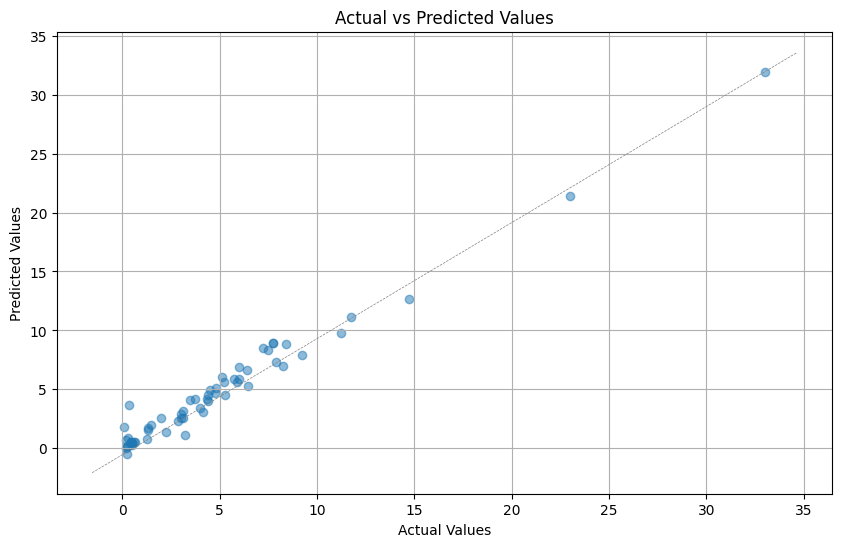

In [50]:
plt.figure(figsize = (10,6))
plt.scatter(y_test,y_pred,alpha = 0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.title('Actual vs Predicted Values')
plt.plot(plt.xlim(),plt.ylim(), '--',linewidth=.5,color='gray' )
plt.show()

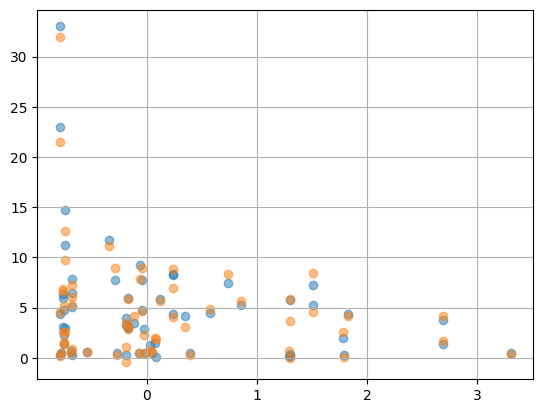

In [51]:
plt.scatter(x_test[: , 1],y_test,alpha = .5)
plt.scatter(x_test[: , 1],y_pred,alpha = .5)
plt.grid()

In [52]:
Ridge.fit(x_train_poly , y_train)
print('Training Accuracy : ' , Ridge.score(x_train_poly, y_train))
print('Testing Accuracy : ' , Ridge.score(x_test_poly , y_test))

Training Accuracy :  0.9775667493436309
Testing Accuracy :  0.9652236110275788


In [53]:
poly_feature_names = poly_features.get_feature_names_out()
poly_feature_names

array(['Age', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type',
       'Transmission', 'Owner', 'Age^2', 'Age Present_Price',
       'Age Kms_Driven', 'Age Fuel_Type', 'Age Seller_Type',
       'Age Transmission', 'Age Owner', 'Present_Price^2',
       'Present_Price Kms_Driven', 'Present_Price Fuel_Type',
       'Present_Price Seller_Type', 'Present_Price Transmission',
       'Present_Price Owner', 'Kms_Driven^2', 'Kms_Driven Fuel_Type',
       'Kms_Driven Seller_Type', 'Kms_Driven Transmission',
       'Kms_Driven Owner', 'Fuel_Type^2', 'Fuel_Type Seller_Type',
       'Fuel_Type Transmission', 'Fuel_Type Owner', 'Seller_Type^2',
       'Seller_Type Transmission', 'Seller_Type Owner', 'Transmission^2',
       'Transmission Owner', 'Owner^2'], dtype=object)

In [54]:
x_poly_df = pd.DataFrame(x_poly , columns = poly_feature_names)


In [55]:
x_train_poly , x_test_poly , y_train , y_test = train_test_split(x_poly_df , y , test_size=0.2)


x_train_poly = scaler.fit_transform(x_train_poly)
x_test_poly = scaler.transform(x_test_poly)

In [56]:
rfe = RFE(model , n_features_to_select=None)
rfe.fit(x_train_poly , y_train)


RFE(estimator=LinearRegression())

In [57]:
primary_features = np.array(poly_feature_names)[rfe.support_]
primary_features

array(['Age', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type',
       'Age^2', 'Age Present_Price', 'Age Kms_Driven', 'Age Fuel_Type',
       'Age Seller_Type', 'Present_Price^2', 'Present_Price Kms_Driven',
       'Present_Price Fuel_Type', 'Present_Price Seller_Type',
       'Kms_Driven Fuel_Type', 'Fuel_Type Seller_Type', 'Seller_Type^2'],
      dtype=object)

In [58]:
primary_features.shape

(17,)

In [59]:
x_poly_primary = x_poly_df[primary_features]
x_poly_primary

,Age,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Age^2,Age Present_Price,Age Kms_Driven,Age Fuel_Type,Age Seller_Type,Present_Price^2,Present_Price Kms_Driven,Present_Price Fuel_Type,Present_Price Seller_Type,Kms_Driven Fuel_Type,Fuel_Type Seller_Type,Seller_Type^2
0,5.0,5.59,27.0,2.0,0.0,25.0,27.95,135.0,10.0,0.0,31.2481,150.930,11.18,0.0,54.0,0.0,0.0
1,6.0,9.54,43.0,1.0,0.0,36.0,57.24,258.0,6.0,0.0,91.0116,410.220,9.54,0.0,43.0,0.0,0.0
2,2.0,9.85,6.9,2.0,0.0,4.0,19.70,13.8,4.0,0.0,97.0225,67.965,19.70,0.0,13.8,0.0,0.0
3,8.0,4.15,5.2,2.0,0.0,64.0,33.20,41.6,16.0,0.0,17.2225,21.580,8.30,0.0,10.4,0.0,0.0
4,5.0,6.87,42.4,1.0,0.0,25.0,34.35,212.0,5.0,0.0,47.1969,291.288,6.87,0.0,42.4,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,3.0,11.60,34.0,1.0,0.0,9.0,34.80,102.0,3.0,0.0,134.5600,394.400,11.60,0.0,34.0,0.0,0.0
297,4.0,5.90,60.0,2.0,0.0,16.0,23.60,240.0,8.0,0.0,34.8100,354.000,11.80,0.0,120.0,0.0,0.0
298,10.0,11.00,87.9,2.0,0.0,100.0,110.00,879.0,20.0,0.0,121.0000,966.900,22.00,0.0,175.8,0.0,0.0
299,2.0,12.50,9.0,1.0,0.0,4.0,25.00,18.0,2.0,0.0,156.2500,112.500,12.50,0.0,9.0,0.0,0.0


In [60]:
x_train_poly_primary , x_test_poly_primary , y_train , y_test = train_test_split(x_poly_primary , y , test_size=0.2)


x_train_pp = scaler.fit_transform(x_train_poly_primary)
x_test_pp = scaler.transform(x_test_poly_primary)

In [61]:
model.fit(x_train_pp , y_train)
print('Training Accuracy : ' , model.score(x_train_pp , y_train))
print('Testing Accuracy : ' , model.score(x_test_pp , y_test))

Training Accuracy :  0.9803376931670608
Testing Accuracy :  0.9690286997357311


In [62]:
y_pred = model.predict(x_test_pp)

print('Mean Absolute Error : ',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error : ',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error : ' , np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2 Score : ',r2_score(y_test,y_pred))

Mean Absolute Error :  0.6289202363332057
Mean Squared Error :  0.6712783459609001
Root Mean Squared Error :  0.8193157791480036
R2 Score :  0.9690286997357311


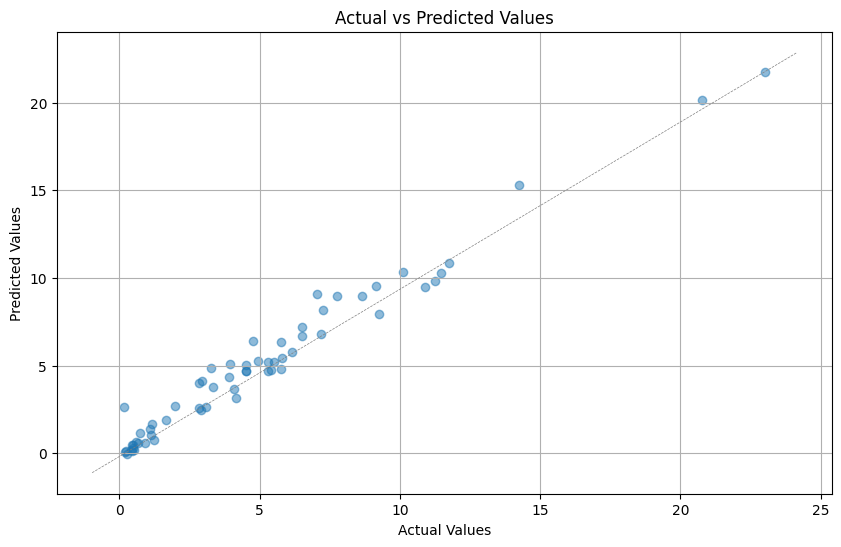

In [63]:
plt.figure(figsize = (10,6))
plt.scatter(y_test,y_pred,alpha = 0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.title('Actual vs Predicted Values')
plt.plot(plt.xlim(),plt.ylim(), '--',linewidth=.5,color='gray' )
plt.show()

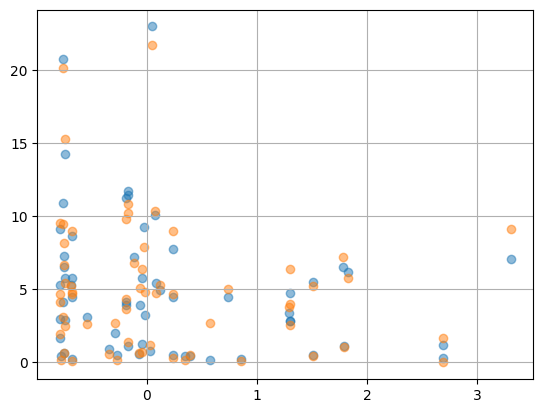

In [64]:
plt.scatter(x_test[: , 1],y_test,alpha = .5)
plt.scatter(x_test[: , 1],y_pred,alpha = .5)
plt.grid()